# DS Automation Assignment

Using our prepared churn data from week 2:
- use pycaret to find an ML algorithm that performs best on the data
    - Choose a metric you think is best to use for finding the best model; by default, it is accuracy but it could be AUC, precision, recall, etc. The week 3 FTE has some information on these different metrics.
- save the model to disk
- create a Python script/file/module with a function that takes a pandas dataframe as an input and returns the probability of churn for each row in the dataframe
    - your Python file/function should print out the predictions for new data (new_churn_data.csv)
    - the true values for the new data are [1, 0, 0, 1, 0] if you're interested
- test your Python module and function with the new data, new_churn_data.csv
- write a short summary of the process and results at the end of this notebook
- upload this Jupyter Notebook and Python file to a Github repository, and turn in a link to the repository in the week 5 assignment dropbox

*Optional* challenges:
- return the probability of churn for each new prediction, and the percentile where that prediction is in the distribution of probability predictions from the training dataset (e.g. a high probability of churn like 0.78 might be at the 90th percentile)
- use other autoML packages, such as TPOT, H2O, MLBox, etc, and compare performance and features with pycaret
- create a class in your Python module to hold the functions that you created
- accept user input to specify a file using a tool such as Python's `input()` function, the `click` package for command-line arguments, or a GUI
- Use the unmodified churn data (new_unmodified_churn_data.csv) in your Python script. This will require adding the same preprocessing steps from week 2 since this data is like the original unmodified dataset from week 1.

In [227]:
import pandas as pd 

In [228]:
df = pd.read_csv('Clean_Churn_data.csv', index_col='customerID')
df

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,
7590-VHVEG,1,0,0,0,29.85,29.85,0
5575-GNVDE,34,1,1,1,56.95,1889.50,0
3668-QPYBK,2,1,0,1,53.85,108.15,1
7795-CFOCW,45,0,1,2,42.30,1840.75,0
9237-HQITU,2,1,0,0,70.70,151.65,1
...,...,...,...,...,...,...,...
6840-RESVB,24,1,1,1,84.80,1990.50,0
2234-XADUH,72,1,1,3,103.20,7362.90,0
4801-JZAZL,11,0,0,0,29.60,346.45,0


In [80]:
df

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,
7590-VHVEG,1,0,0,0,29.85,29.85,0
5575-GNVDE,34,1,1,1,56.95,1889.50,0
3668-QPYBK,2,1,0,1,53.85,108.15,1
7795-CFOCW,45,0,1,2,42.30,1840.75,0
9237-HQITU,2,1,0,0,70.70,151.65,1
...,...,...,...,...,...,...,...
6840-RESVB,24,1,1,1,84.80,1990.50,0
2234-XADUH,72,1,1,3,103.20,7362.90,0
4801-JZAZL,11,0,0,0,29.60,346.45,0


In [229]:
from pycaret.classification import ClassificationExperiment

In [230]:
automl = ClassificationExperiment()

In [231]:
automl.setup(df, target='Churn')

,Description,Value
0,Session id,4034
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(7032, 7)"
4,Transformed data shape,"(7032, 7)"
5,Transformed train set shape,"(4922, 7)"
6,Transformed test set shape,"(2110, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


In [232]:
automl

In [182]:
best_model = automl.compare_models(sort='MCC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.7548,0.8281,0.7469,0.5272,0.6180,0.4453,0.4601,0.0180
lr,Logistic Regression,0.7985,0.8399,0.5252,0.6497,0.5806,0.4499,0.4545,0.0510
ada,Ada Boost Classifier,0.7962,0.8381,0.5099,0.6483,0.5702,0.4393,0.4451,0.0540
gbc,Gradient Boosting Classifier,0.7962,0.8391,0.4999,0.6523,0.5657,0.4357,0.4425,0.1100
lightgbm,Light Gradient Boosting Machine,0.7926,0.8291,0.5214,0.6330,0.5716,0.4365,0.4402,0.6210
lda,Linear Discriminant Analysis,0.7899,0.8251,0.4962,0.6346,0.5563,0.4215,0.4273,0.0150
nb,Naive Bayes,0.7208,0.8117,0.7737,0.4842,0.5955,0.3992,0.4250,0.0120
ridge,Ridge Classifier,0.7940,0.0000,0.4465,0.6689,0.5349,0.4094,0.4235,0.0100
rf,Random Forest Classifier,0.7745,0.8026,0.4885,0.5914,0.5344,0.3876,0.3910,0.1290
et,Extra Trees Classifier,0.7635,0.7836,0.4892,0.5633,0.5232,0.3671,0.3690,0.1090


In [233]:
best_model

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

Almost purely because I understand the plot the most of the options, I chose to use the Confusion matrix as my main identifier of which model to use. 

I decided I wanted to focus on eliminating false negatives & get the most accurate positive prediction.
Quadratic Discrimination provided The highest amount of true positives and the lowest amount of false calls. This was focused on a MCC score.

'Guassian' and 'Ridge Classifier' were by far the worst rate of false calls. These were focused on 'Recall' and 'Prec.' scores.

I tested a bunch of confusion matrix's with different best models and sort focus's and what you see now is what I've determined as best fit. I cleaned up the excess plots. 

In [234]:
automl.evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

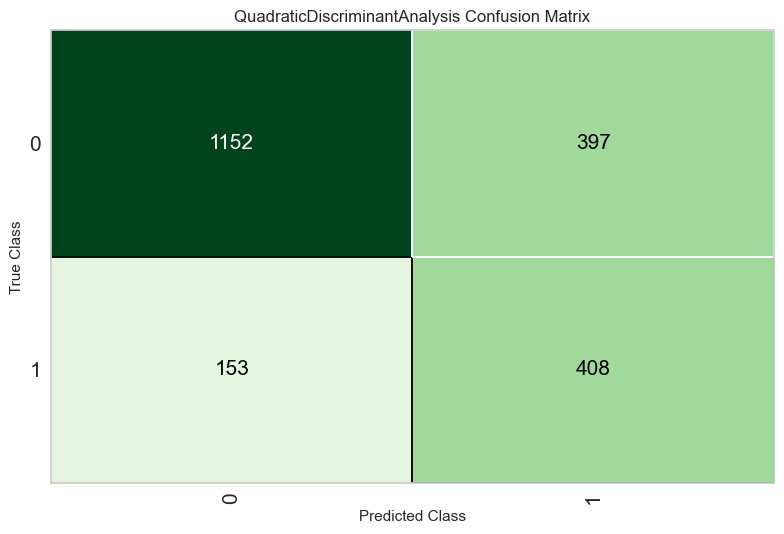

In [235]:
automl.plot_model(best_model, plot = 'confusion_matrix')

In [237]:
df.iloc[-2,-1]

1

In [238]:
automl.predict_model(best_model, df.iloc[-2:-1])

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,prediction_label,prediction_score
customerID,,,,,,,,,
8361-LTMKD,4,1,0,1,74.400002,306.600006,1,1,0.9198


In [239]:
predictions = automl.predict_model(best_model, data=df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Quadratic Discriminant Analysis,0.7507,0.8257,0.7442,0.5218,0.6135,0.4378,0.4528


In [190]:
predictions.head(10)

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,prediction_label,prediction_score
customerID,,,,,,,,,
7590-VHVEG,1,0,0,0,29.850000,29.850000,0,1,0.7901
5575-GNVDE,34,1,1,1,56.950001,1889.500000,0,0,0.9776
3668-QPYBK,2,1,0,1,53.849998,108.150002,1,1,0.7429
7795-CFOCW,45,0,1,2,42.299999,1840.750000,0,0,0.9994
9237-HQITU,2,1,0,0,70.699997,151.649994,1,1,0.9205
9305-CDSKC,8,1,0,0,99.650002,820.500000,1,1,0.9891
1452-KIOVK,22,1,0,3,89.099998,1949.400024,0,1,0.7903
6713-OKOMC,10,0,0,1,29.750000,301.899994,0,1,0.7739
7892-POOKP,28,1,0,0,104.800003,3046.050049,1,1,0.8707


In [192]:
automl.save_model(best_model, 'pycaret_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['tenure', 'PhoneService',
                                              'Contract', 'PaymentMethod',
                                              'MonthlyCharges', 'TotalCharges'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='deprecated'))),
                 ('...gorical_imputer',
                  Trans

In [240]:
new_pycaret = ClassificationExperiment()
loaded_model = new_pycaret.load_model('pycaret_model')

Transformation Pipeline and Model Successfully Loaded


In [242]:
new_data = df.iloc[-2:-1]

In [243]:
new_pycaret.predict_model(loaded_model, new_data)

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,prediction_label,prediction_score
customerID,,,,,,,,,
8361-LTMKD,4,1,0,1,74.400002,306.600006,1,1,0.9198


same output!

In [202]:
from IPython.display import Code

This doesn't seem to create a .py, I tried to manually change the provided diabetes.py 

In [246]:
Code('predict_churn.py')

import pandas as pd
from pycaret.classification import ClassificationExperiment

def load_data(filepath):
    """
    Loads diabetes data into a DataFrame from a string filepath.
    """
    df = pd.read_csv(filepath, index_col='customerID')
    return df


def make_predictions(df):
    """
    Uses the pycaret best model to make predictions on data in the df dataframe.con
    """
    classifier = ClassificationExperiment()
    model = classifier.load_model('pycaret_model')
    predictions = classifier.predict_model(model, data=df)
    #predictions.rename({'Label': 'Churn_prediction'}, axis=1, inplace=True)
    #predictions['Churn_prediction'].replace({1: 'Yes', 0: 'No'},
    #                                        inplace=True)
    return predictions #['Churn_prediction']


if __name__ == "__main__":
    df = load_data('Clean_Churn_data.csv')
    predictions = make_predictions(df)
    print('predictions:')
    print(predictions)

I am shocked I got this to work.. (:

In [247]:
%run predict_churn.py

Transformation Pipeline and Model Successfully Loaded
predictions:
            tenure  PhoneService  Contract  PaymentMethod  MonthlyCharges  \
customerID                                                                  
7590-VHVEG       1             0         0              0       29.850000   
5575-GNVDE      34             1         1              1       56.950001   
3668-QPYBK       2             1         0              1       53.849998   
7795-CFOCW      45             0         1              2       42.299999   
9237-HQITU       2             1         0              0       70.699997   
...            ...           ...       ...            ...             ...   
6840-RESVB      24             1         1              1       84.800003   
2234-XADUH      72             1         1              3      103.199997   
4801-JZAZL      11             0         0              0       29.600000   
8361-LTMKD       4             1         0              1       74.400002   
3186-AJIE

Going to run this again with the new churn data, the above is my old modified.

In [248]:
Code('predict_churn.py')

import pandas as pd
from pycaret.classification import ClassificationExperiment

def load_data(filepath):
    """
    Loads diabetes data into a DataFrame from a string filepath.
    """
    df = pd.read_csv(filepath, index_col='customerID')
    return df


def make_predictions(df):
    """
    Uses the pycaret best model to make predictions on data in the df dataframe.con
    """
    classifier = ClassificationExperiment()
    model = classifier.load_model('pycaret_model')
    predictions = classifier.predict_model(model, data=df)
    #predictions.rename({'Label': 'Churn_prediction'}, axis=1, inplace=True)
    #predictions['Churn_prediction'].replace({1: 'Yes', 0: 'No'},
    #                                        inplace=True)
    return predictions #['Churn_prediction']


if __name__ == "__main__":
    df = load_data('new_churn_data.csv')
    predictions = make_predictions(df)
    print('predictions:')
    print(predictions)

In [249]:
%run predict_churn.py

Transformation Pipeline and Model Successfully Loaded
predictions:
            tenure  PhoneService  Contract  PaymentMethod  MonthlyCharges  \
customerID                                                                  
9305-CKSKC      22             1         0              2       97.400002   
1452-KNGVK       8             0         1              1       77.300003   
6723-OKKJM      28             1         0              0       28.250000   
7832-POPKP      62             1         0              2      101.699997   
6348-TACGU      10             0         0              1       51.150002   

            TotalCharges  charge_per_tenure  prediction_label  \
customerID                                                      
9305-CKSKC    811.700012          36.895454                 1   
1452-KNGVK   1701.949951         212.743744                 0   
6723-OKKJM    250.899994           8.960714                 0   
7832-POPKP   3106.560059          50.105808                 0   
634

Well, It seems I am missing one correct answer, Customer #3 (in computer numbering). But I am honestly surprised I made it this far! 

# Summary

Write a short summary of the process and results here.